# Describe Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [4]:
numerical = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical = df.drop(columns=numerical).columns.tolist()
ratings = df[numerical].drop(columns=['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes'], axis=1).columns.tolist()

In [5]:
df[ratings].agg(['mean'])

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
mean,2.838597,2.990645,2.851994,2.990422,3.24913,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587


In [6]:
#Ratings overall
df[ratings].stack().mean()

3.3101340798099343

# Preprocessing

### Null & 0 Value

In [7]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [10]:
#change 0 value to mode
for i in range(0,len(ratings)):
    mode = df[ratings[i]].mode()
    df[ratings[i]] = df[ratings[i]].replace(0,mode[0])

### Duplicate Value

In [11]:
df.duplicated().sum()

0

In [12]:
# df_clean = df.replace(0,np.nan).dropna(subset=ratings)
# df_clean = df_clean.replace(np.nan,0)
# df_clean[numerical] = df_clean[numerical].astype('int64')

In [13]:
df_clean = df.copy()

In [14]:
#no duplicates in the data

### Feature Engineering

In [15]:
#label satisfaction
df_clean['satisfaction_label'] = df_clean['satisfaction'].map({'satisfied':1, 'dissatisfied':0})
df_clean['satisfaction_label'].value_counts()

1    70882
0    58605
Name: satisfaction_label, dtype: int64

In [16]:
#new column total delay
df_clean['total_delay'] = df_clean['Departure Delay in Minutes'] + df_clean['Arrival Delay in Minutes']


In [17]:
# # #travel type & gender label
# df_clean['Gender_Male'] = df_clean['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
# df_clean['Travel_Personal'] = df_clean['Type of Travel'].apply(lambda x: 1 if x == 'Personal Travel' else 0)


In [18]:
# # #customer type label
# df_clean['Loyal_customer'] = df_clean['Customer Type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)


In [19]:
# # #class label
# df_clean['Class'] = df_clean['Class'].map({'Eco':'Economy', 'Eco Plus':'Economy','Business':'Business'})
# df_clean['Class_Economy'] = df_clean['Class'].apply(lambda x: 1 if x == 'Economy' else 0)

In [20]:
df_eda = df_clean.copy()
df_eda.drop(columns=['Departure Delay in Minutes','Arrival Delay in Minutes'], inplace=True)
# df_eda.drop(columns=['Gender','Type of Travel'], inplace=True)
# df_eda.drop(columns='Customer Type', inplace=True)
# df_eda.drop(columns='Class', inplace=True)

# EDA

<AxesSubplot:>

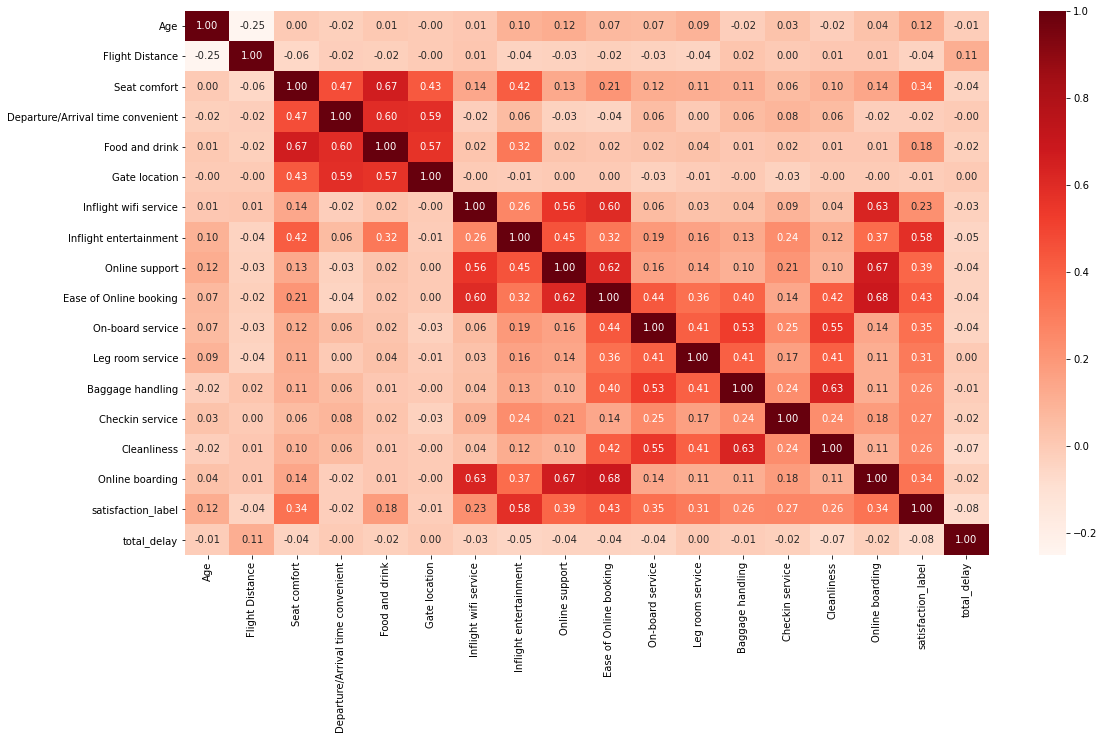

In [21]:
plt.figure(figsize=(18,10))
sns.heatmap(df_eda.corr(), cmap='Reds', annot=True, fmt='.2f')

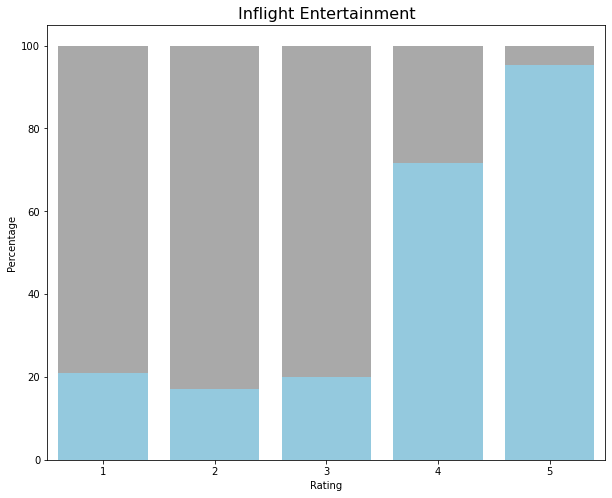

In [22]:
#Inflight Entertainment Satisfaction Rate
inf_entertain = df_eda.groupby(['Inflight entertainment','satisfaction_label']).agg({'Age':'count'}).reset_index()
inf_entertain.columns = ['Rating', 'satisfaction', 'Customer Rated']
inf_entertain['Percentage'] = (inf_entertain['Customer Rated']/inf_entertain.groupby(['Rating'])['Customer Rated'].transform('sum'))*100
inf_entertain['Total_Percentage'] = (inf_entertain['Customer Rated']/inf_entertain['Customer Rated'])*100
inf_entertain_sat = inf_entertain[inf_entertain.satisfaction ==1]

plt.figure(figsize=(10,8))
bar1 = sns.barplot(x='Rating',y='Total_Percentage',data=inf_entertain, color='darkgrey')
bar2 = sns.barplot(x='Rating',y='Percentage',data=inf_entertain_sat, color='skyblue')
plt.title('Inflight Entertainment', fontsize=16);

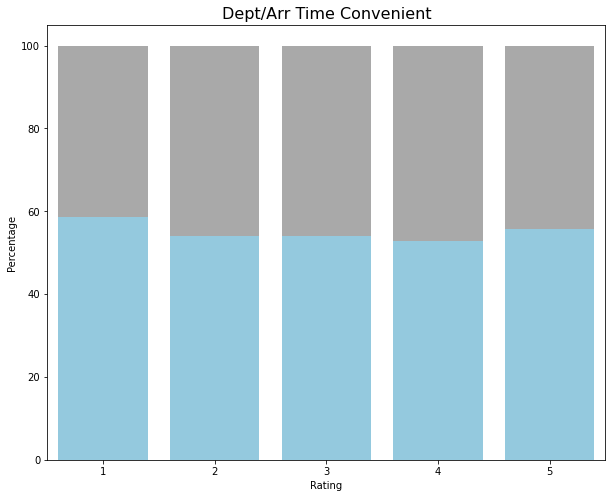

In [23]:
#Dept/Arrival Time Convenient
deptarr = df_eda.groupby(['Departure/Arrival time convenient','satisfaction_label']).agg({'Age':'count'}).reset_index()
deptarr.columns = ['Rating', 'satisfaction', 'Customer Rated']
deptarr['Percentage'] = (deptarr['Customer Rated']/deptarr.groupby(['Rating'])['Customer Rated'].transform('sum'))*100
deptarr['Total_Percentage'] = (deptarr['Customer Rated']/deptarr['Customer Rated'])*100
deptarr_sat = deptarr[deptarr.satisfaction ==1]

plt.figure(figsize=(10,8))
bar1 = sns.barplot(x='Rating',y='Total_Percentage',data=deptarr, color='darkgrey')
bar2 = sns.barplot(x='Rating',y='Percentage',data=deptarr_sat, color='skyblue')
plt.title('Dept/Arr Time Convenient', fontsize=16);

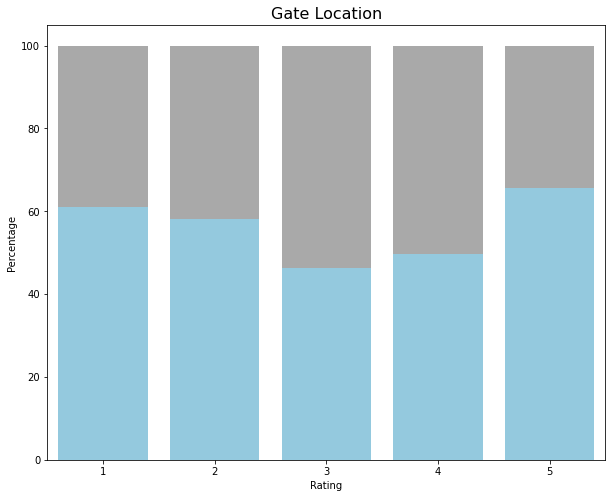

In [24]:
#Gate Location
gateloc = df_eda.groupby(['Gate location','satisfaction_label']).agg({'Age':'count'}).reset_index()
gateloc.columns = ['Rating', 'satisfaction', 'Customer Rated']
gateloc['Percentage'] = (gateloc['Customer Rated']/gateloc.groupby(['Rating'])['Customer Rated'].transform('sum'))*100
gateloc['Total_Percentage'] = (gateloc['Customer Rated']/gateloc['Customer Rated'])*100
gateloc_sat = gateloc[gateloc.satisfaction ==1]

plt.figure(figsize=(10,8))
bar1 = sns.barplot(x='Rating',y='Total_Percentage',data=gateloc, color='darkgrey')
bar2 = sns.barplot(x='Rating',y='Percentage',data=gateloc_sat, color='skyblue')
plt.title('Gate Location', fontsize=16);

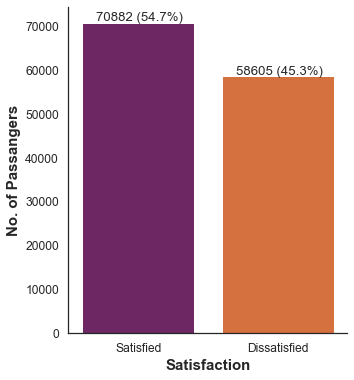

In [25]:
sns.set(style='white', font_scale=1.1)
fig = plt.figure(figsize=(5,6))
ax = sns.countplot(data=df_clean, x='satisfaction_label', palette='inferno', order=[1,0])
ax.set_xticklabels(['Satisfied','Dissatisfied'])
for p in ax.patches:
    ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df_clean)*100).round(1))+'%)',(p.get_x()+0.1,p.get_height()+400))
plt.xlabel('Satisfaction', weight='bold', fontsize=15)
plt.ylabel('No. of Passangers', weight='bold', fontsize=15)
sns.despine()

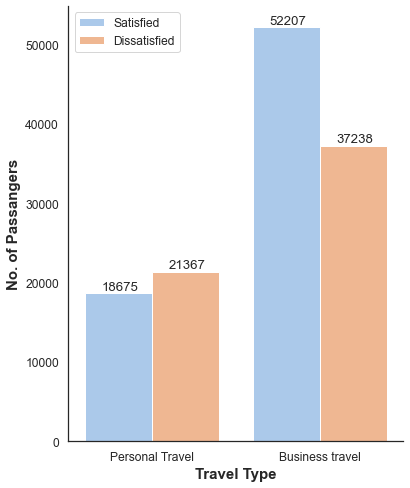

In [26]:
sns.set(style='white', font_scale=1.1)
fig = plt.figure(figsize=(6,8))
ax = sns.countplot(data=df_clean, x='Type of Travel', palette='pastel', hue='satisfaction_label', hue_order=[1,0])
ax.legend(labels=['Satisfied','Dissatisfied'])
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.1,p.get_height()+400))
plt.xlabel('Travel Type', weight='bold', fontsize=15)
plt.ylabel('No. of Passangers', weight='bold', fontsize=15)
sns.despine()

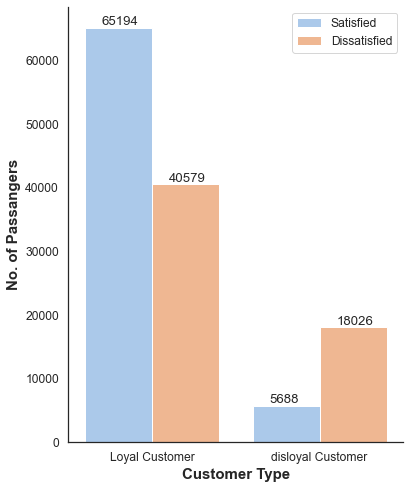

In [27]:
sns.set(style='white', font_scale=1.1)
fig = plt.figure(figsize=(6,8))
ax = sns.countplot(data=df_clean, x='Customer Type', palette='pastel', hue='satisfaction_label', hue_order=[1,0])
ax.legend(labels=['Satisfied','Dissatisfied'])
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.1,p.get_height()+400))
plt.xlabel('Customer Type', weight='bold', fontsize=15)
plt.ylabel('No. of Passangers', weight='bold', fontsize=15)
sns.despine()

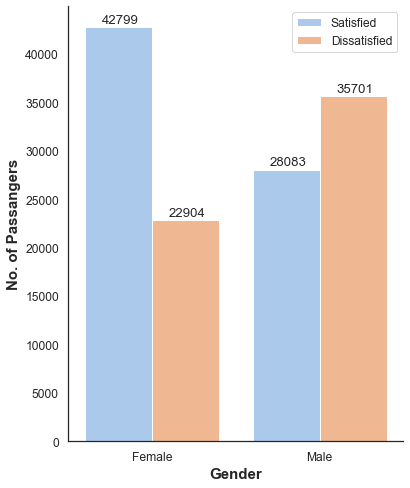

In [28]:
sns.set(style='white', font_scale=1.1)
fig = plt.figure(figsize=(6,8))
ax = sns.countplot(data=df_clean, x='Gender', palette='pastel', hue='satisfaction_label',hue_order=[1,0])
ax.set_xticklabels(['Female','Male'])
ax.legend(labels=['Satisfied','Dissatisfied'])
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.1,p.get_height()+400))
plt.xlabel('Gender', weight='bold', fontsize=15)
plt.ylabel('No. of Passangers', weight='bold', fontsize=15)
sns.despine()

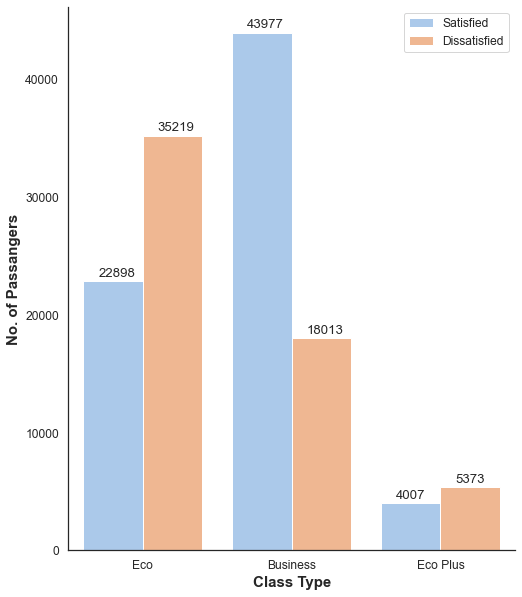

In [29]:
sns.set(style='white', font_scale=1.1)
fig = plt.figure(figsize=(8,10))
ax = sns.countplot(data=df_clean, x='Class', palette='pastel', hue='satisfaction_label', hue_order=[1,0])

ax.legend(labels=['Satisfied','Dissatisfied'])
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.1,p.get_height()+400))
plt.xlabel('Class Type', weight='bold', fontsize=15)
plt.ylabel('No. of Passangers', weight='bold', fontsize=15)
sns.despine()

In [30]:
df_eda2 = df_eda.drop(columns=['satisfaction','Gender','Customer Type','Class','Type of Travel'])
df_pre = df_eda.copy()

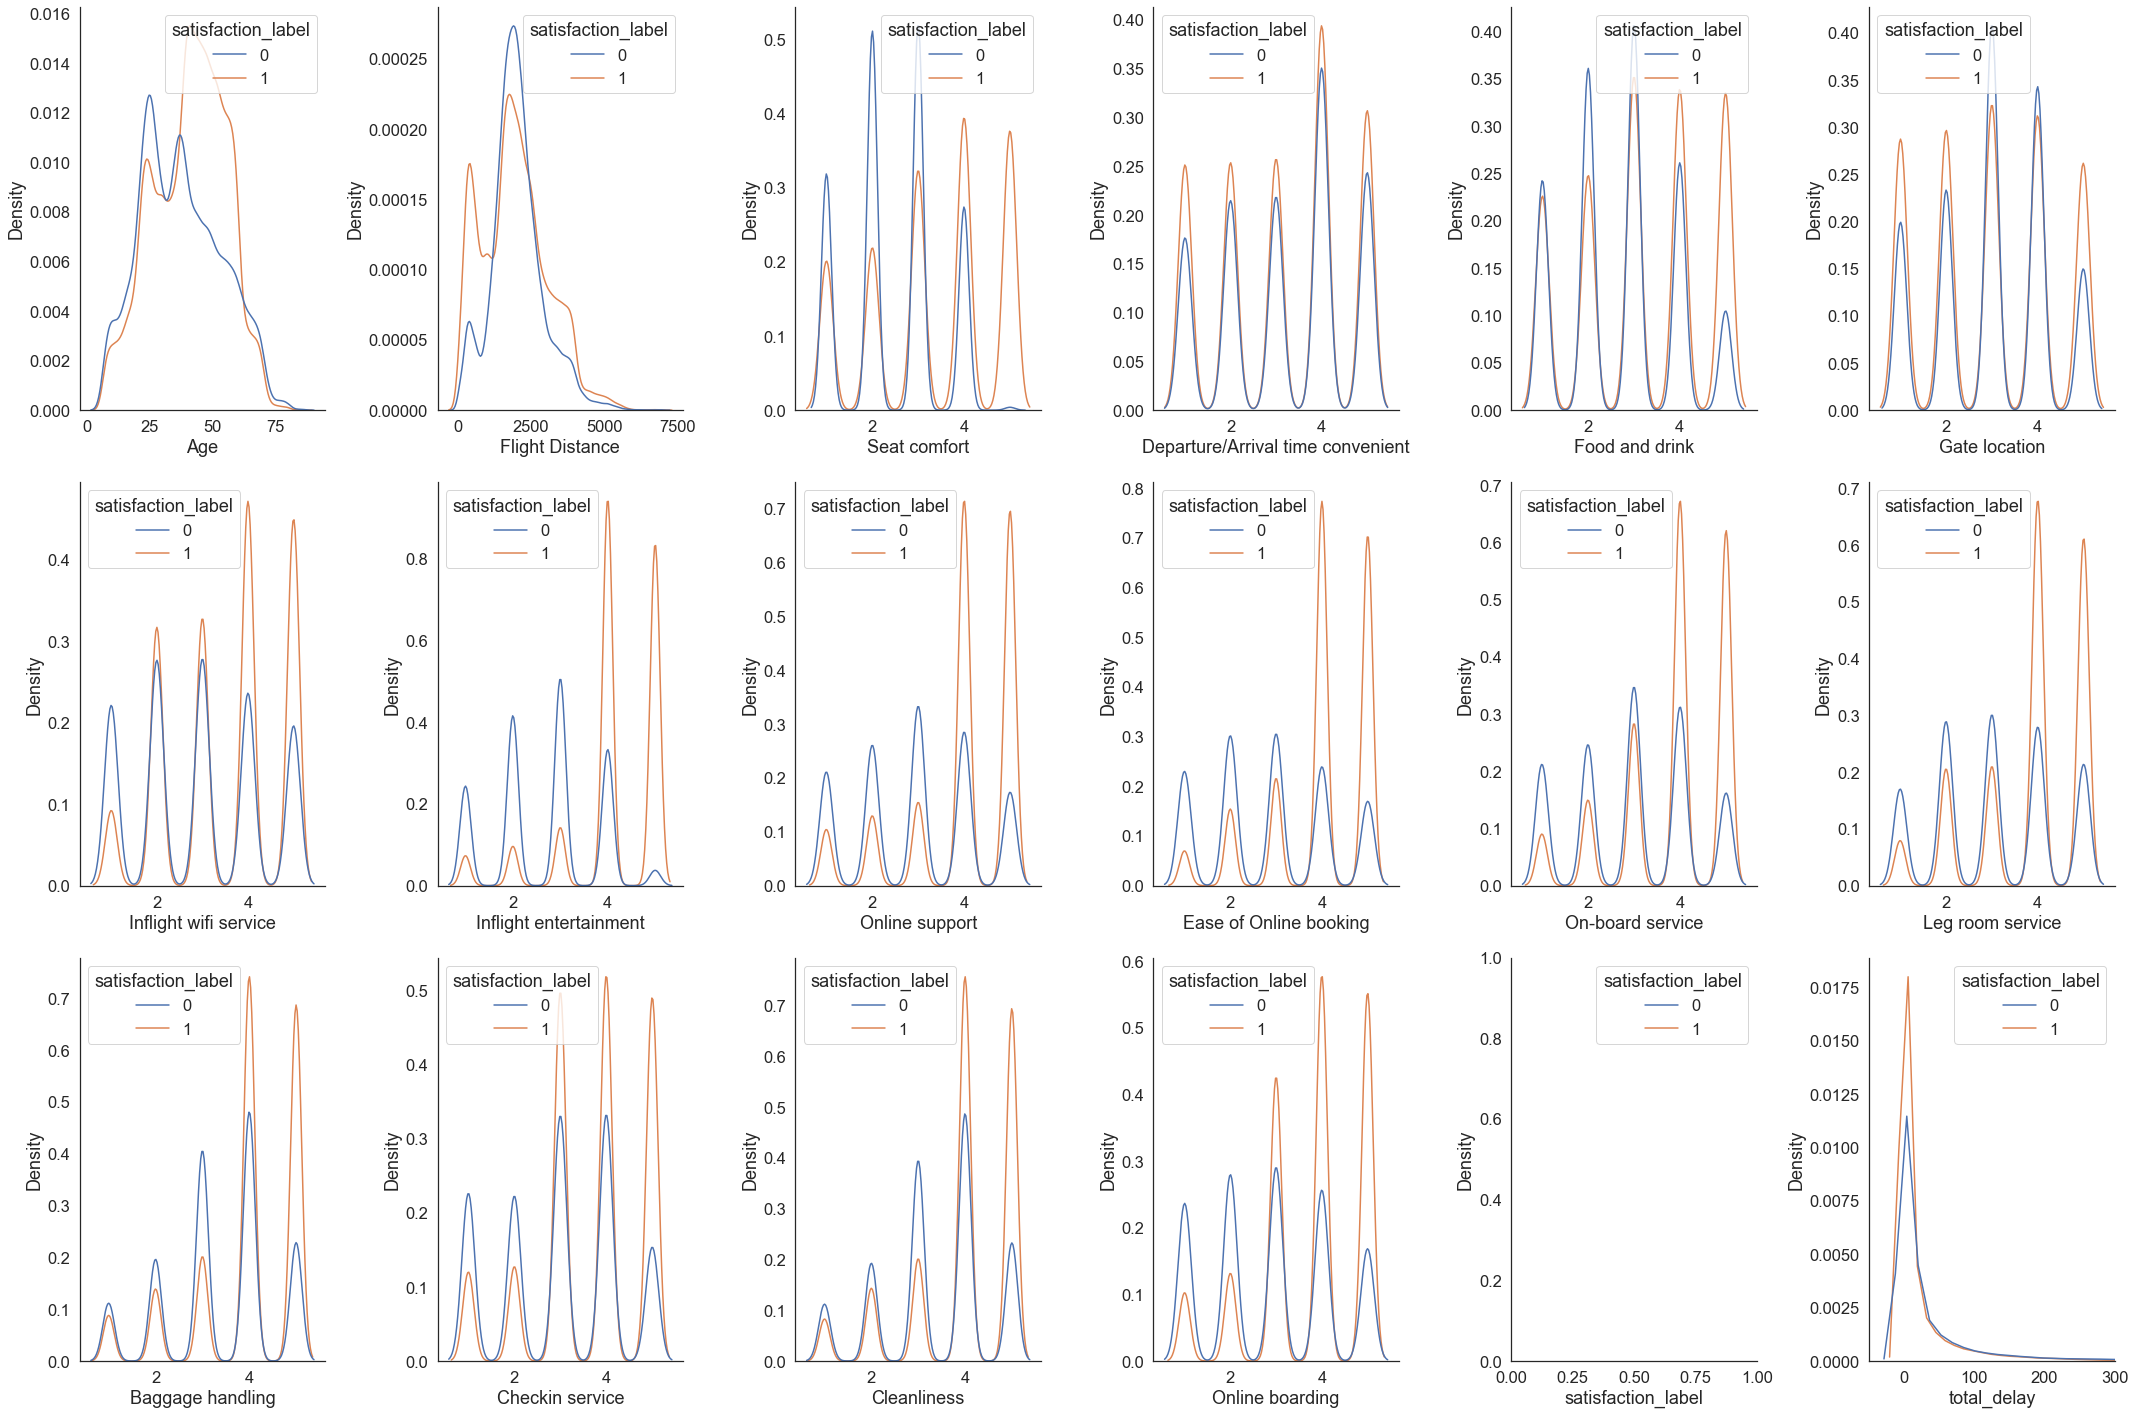

In [31]:
sns.set(style='white',font_scale=1.5)
fig = plt.figure(figsize=(30,20))
for i in range (18):
    fig.add_subplot(3,6,i+1)
    sns.kdeplot(data=df_pre,x=df_eda2.columns[i], hue='satisfaction_label')
    if i == 17:
        plt.xlim(-50,300)
    sns.despine()
    plt.tight_layout()

## Normalization/Outliers Correction

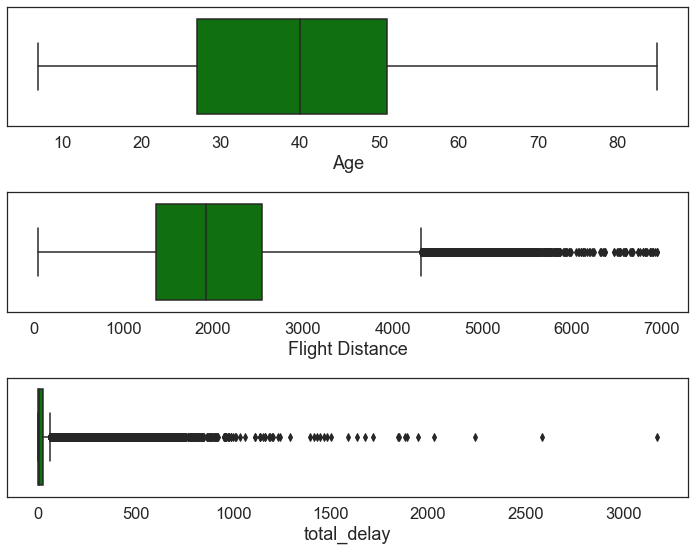

In [32]:
plt.figure(figsize=(10,8))
for i in range(0, len(['Age','Flight Distance','total_delay'])):
    plt.subplot(3, 1, i+1)
    sns.boxplot(df_pre[['Age','Flight Distance','total_delay'][i]], color='green', orient='h')
    plt.tight_layout()

In [33]:
for var in ['Flight Distance', 'total_delay']:
    df_pre[var] = (df_pre[var]+1).apply(np.log)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
for var in ['Age','Flight Distance','total_delay']:
    df_pre[var]= MinMaxScaler().fit_transform(df_pre[var].values.reshape(len(df_pre), 1))

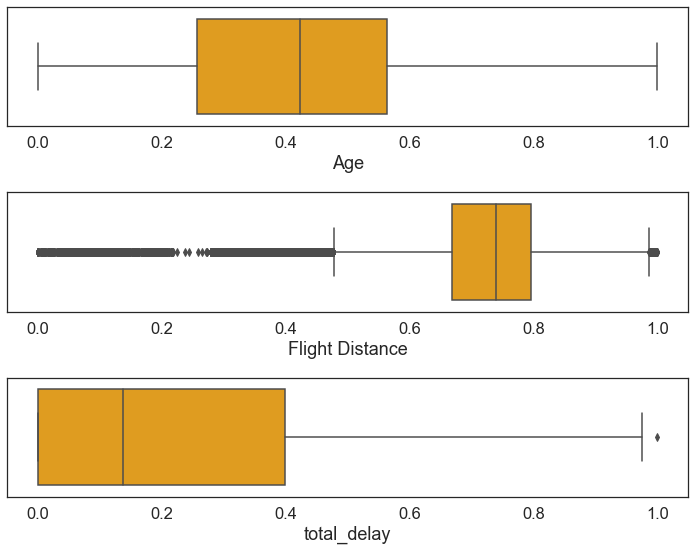

In [34]:
plt.figure(figsize=(10,8))
for i in range(0, len(['Age','Flight Distance','total_delay'])):
    plt.subplot(3, 1, i+1)
    sns.boxplot(df_pre[['Age','Flight Distance','total_delay'][i]], color='orange', orient='h')
    plt.tight_layout()

In [35]:
# print(f'Jumlah baris sebelum memfilter outlier: {len(df_pre)}')

# filtered_entries = np.array([True] * len(df_pre))
# for col in ['Flight Distance']:
#     Q1 = df_pre[col].quantile(0.25)
#     Q3 = df_pre[col].quantile(0.75)
#     IQR = Q3 - Q1
#     low_limit = Q1 - (IQR * 1.5)
#     high_limit = Q3 + (IQR * 1.5)

#     filtered_entries = ((df_pre[col] >= low_limit) & (df_pre[col] <= high_limit)) & filtered_entries
    
# df_iqr = df_pre[filtered_entries]

# print(f'Jumlah baris setelah memfilter outlier: {len(df_iqr)}')

In [36]:
# plt.figure(figsize=(10,8))
# for i in range(0, len(['Age','Flight Distance','total_delay'])):
#     plt.subplot(3, 1, i+1)
#     sns.boxplot(df_iqr[['Age','Flight Distance','total_delay'][i]], color='orange', orient='h')
#     plt.tight_layout()

### Feature Encoding

In [37]:
df_model = df_pre.copy()

In [38]:
dummies_category = pd.get_dummies(df_model['Gender'],prefix='Gender')
df_model = pd.concat([df_model, dummies_category], axis=1)
df_model.drop(columns='Gender', axis=1, inplace=True)

In [39]:
dummies_category = pd.get_dummies(df_model['Customer Type'],prefix='Customer Type')
df_model = pd.concat([df_model, dummies_category], axis=1)
df_model.drop(columns='Customer Type', axis=1, inplace=True)

In [40]:
dummies_category = pd.get_dummies(df_model['Class'],prefix='Class')
df_model = pd.concat([df_model, dummies_category], axis=1)
df_model.drop(columns='Class', axis=1, inplace=True)

In [41]:
dummies_category = pd.get_dummies(df_model['Type of Travel'],prefix='Travel')
df_model = pd.concat([df_model, dummies_category], axis=1)
df_model.drop(columns='Type of Travel', axis=1, inplace=True)

In [45]:
dummies_category

,Travel_Business travel,Travel_Personal Travel
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
129875,0,1
129876,0,1
129877,0,1
129878,0,1


In [42]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Age                                129487 non-null  float64
 2   Flight Distance                    129487 non-null  float64
 3   Seat comfort                       129487 non-null  int64  
 4   Departure/Arrival time convenient  129487 non-null  int64  
 5   Food and drink                     129487 non-null  int64  
 6   Gate location                      129487 non-null  int64  
 7   Inflight wifi service              129487 non-null  int64  
 8   Inflight entertainment             129487 non-null  int64  
 9   Online support                     129487 non-null  int64  
 10  Ease of Online booking             129487 non-null  int64  
 11  On-board service                   1294

# Modelling

In [108]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.neighbors import KNeighborsClassifier

In [68]:
def eval(model,pred,xtrain,ytrain,xtest,ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    print('AUC Score (Test set): %.2f' % roc_auc_score(ytest,pred))

In [69]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [70]:
X = df_model.drop(columns=['satisfaction','satisfaction_label'], axis=1)
y = df_model['satisfaction_label']

In [72]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3,random_state=42)

### Logistic Regression

In [73]:
logres = LogisticRegression()
logres.fit(Xtrain,ytrain)

y_pred = logres.predict(Xtest)
eval(logres,y_pred,Xtrain,ytrain,Xtest,ytest)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.86
Recall (Test Set): 0.88
F1-Score (Test Set): 0.87
AUC Score (Test set): 0.85


In [74]:
print('Train Accuracy Score :',logres.score(Xtrain,ytrain))
print('Test Accuracy Score :', logres.score(Xtest,ytest))

Train Accuracy Score : 0.8530781112091792
Test Accuracy Score : 0.8531418127525935


### Decision Tree

In [75]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain,ytrain)

y_pred = dt.predict(Xtest)
eval(dt,y_pred,Xtrain,ytrain,Xtest,ytest)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.94
Recall (Test Set): 0.94
F1-Score (Test Set): 0.94
AUC Score (Test set): 0.93


In [76]:
print('Train Accuracy Score :', dt.score(Xtrain,ytrain))
print('Test Accuracy Score :',dt.score(Xtest,ytest))

Train Accuracy Score : 1.0
Test Accuracy Score : 0.9334054109712462


**Hyperparameters Tuning**

In [106]:
#parameters:
criterion = ['gini']
splitter = ['best']
max_depth =[8,10,15]
min_samples_split = [2,5,7,10]
min_samples_leaf = [2,4,5]

hyperparams = dict(criterion = criterion, 
                   splitter = splitter,
                   max_depth = max_depth,
                   min_samples_split = min_samples_split,
                   min_samples_leaf = min_samples_leaf)

#initiate
dt_tuned = RandomizedSearchCV(dt,hyperparams,cv=5, scoring='f1')
dt_tuned.fit(Xtrain,ytrain)

y_pred = dt_tuned.predict(Xtest)
eval(dt_tuned,y_pred,Xtrain,ytrain,Xtest,ytest)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.95
Recall (Test Set): 0.94
F1-Score (Test Set): 0.94
AUC Score (Test set): 0.94


In [107]:
print('Best criterion:', dt_tuned.best_estimator_.get_params()['criterion'])
print('Best splitter:', dt_tuned.best_estimator_.get_params()['splitter'])
print('Best max_depth:', dt_tuned.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', dt_tuned.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', dt_tuned.best_estimator_.get_params()['min_samples_leaf'])

Best criterion: gini
Best splitter: best
Best max_depth: 15
Best min_samples_split: 10
Best min_samples_leaf: 2


### Random Forest

In [78]:
rf = RandomForestClassifier()
rf.fit(Xtrain,ytrain)

y_pred = rf.predict(Xtest)
eval(rf,y_pred,Xtrain,ytrain,Xtest,ytest)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.96
Recall (Test Set): 0.95
F1-Score (Test Set): 0.96
AUC Score (Test set): 0.95


In [79]:
print('Train Accuracy Score :', rf.score(Xtrain,ytrain))
print('Test Accuracy Score :',rf.score(Xtest,ytest))

Train Accuracy Score : 1.0
Test Accuracy Score : 0.9545138620742915


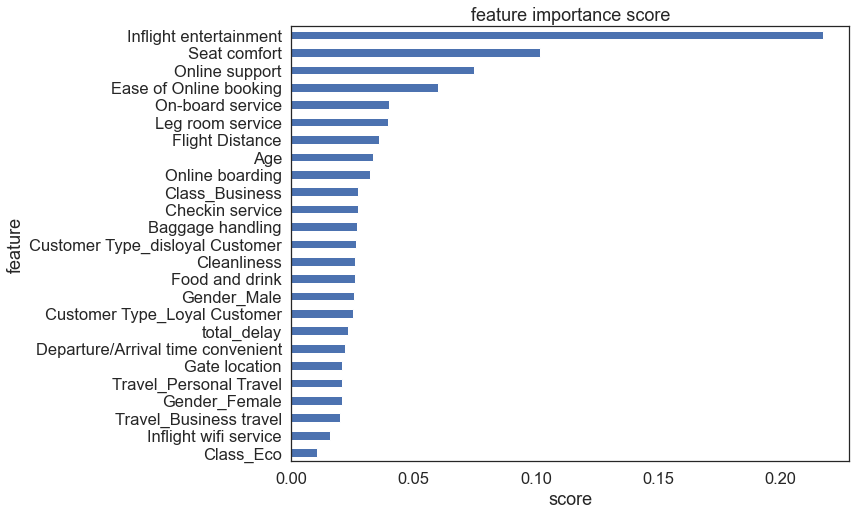

In [80]:
show_feature_importance(rf)

### XGBoost

In [90]:
xg = XGBClassifier(eval_metric='mlogloss')
xg.fit(Xtrain, ytrain)

y_pred = xg.predict(Xtest)
eval(xg, y_pred, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.97
Recall (Test Set): 0.95
F1-Score (Test Set): 0.96
AUC Score (Test set): 0.96


# Conclusions